## Feature Selection using Fisher Score and Chi2(x2) Test| Titanic Dataset

#### What is Fisher Score and Chi(x2) Test

##### Fisher score is one of the most widely used supervised feature selection methods. However, it selects each feature independently according to their scores under the Fisher criterion, which leads to a suboptimal subset of feature

#### Chi Square(x2) Test

##### A chi-squared test, also written as X2 test, is any statistical hypothesis test where the sampling distribution of the test statistic is a chi-squared distribution

##### chi-square test measures dependence between stochastic variables, so using this function "weeds out" the features that are the most likely to be independent of class and therefore irrelevant for classification

In [2]:
# import the packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# import the packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score

In [13]:
titanic=sns.load_dataset("titanic")

In [10]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
titanic.drop(labels= ["age", "deck"], axis=1, inplace=True)

In [15]:
titanic= titanic.dropna()

In [16]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [31]:
data=titanic[["pclass", "sex", "sibsp", "parch", "embarked", "who", "alone"]].copy()

In [32]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,male,1,0,S,man,False
1,1,female,1,0,C,woman,False
2,3,female,0,0,S,woman,True
3,1,female,1,0,S,woman,False
4,3,male,0,0,S,man,True


In [33]:
data.isnull().sum()

pclass      0
sex         0
sibsp       0
parch       0
embarked    0
who         0
alone       0
dtype: int64

In [34]:
sex={"male":0, "female":1}
data["sex"]=data["sex"].map(sex)

In [35]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,S,man,False
1,1,1,1,0,C,woman,False
2,3,1,0,0,S,woman,True
3,1,1,1,0,S,woman,False
4,3,0,0,0,S,man,True


In [36]:
ports={"S":0, "C":1, "Q":2}
data["embarked"]=data["embarked"].map(ports)

In [37]:
who={"man":0, "woman":1, "child":2}
data["who"]=data["who"].map(who)     

In [38]:
alone={True:1, False:0}
data["alone"]=data["alone"].map(alone)

In [39]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,0
1,1,1,1,0,1,1,0
2,3,1,0,0,0,1,1
3,1,1,1,0,0,1,0
4,3,0,0,0,0,0,1


#### Do F-Test

In [46]:
X=data.copy()
y=titanic["survived"]

In [47]:
X.shape, y.shape

((889, 7), (889,))

In [48]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
f_score=chi2(X_train, y_train)

In [49]:
f_score

(array([ 22.65169202, 152.91534343,   0.52934285,  10.35663782,
         16.13255653, 161.42431175,  13.4382363 ]),
 array([1.94189138e-06, 3.99737147e-35, 4.66883271e-01, 1.29009955e-03,
        5.90599986e-05, 5.52664700e-37, 2.46547298e-04]))

In [53]:
p_values=pd.Series(f_score[1], index=X_train.columns)
p_values.sort_values(ascending=True, inplace=True)

In [54]:
p_values

who         5.526647e-37
sex         3.997371e-35
pclass      1.941891e-06
embarked    5.906000e-05
alone       2.465473e-04
parch       1.290100e-03
sibsp       4.668833e-01
dtype: float64

<AxesSubplot:>

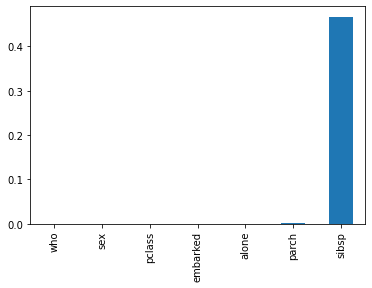

In [55]:
p_values.plot.bar()

In [56]:
X_train_2=X_train[["who", "sex"]]
X_test_2=X_test[["who", "sex"]]                  

In [59]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf=RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test, y_pred))

In [60]:
%%time
run_randomForest(X_train_2, X_test_2, y_train, y_test)

Accuracy:  0.7191011235955056
CPU times: user 278 ms, sys: 81.4 ms, total: 360 ms
Wall time: 382 ms


In [61]:
X_train_3=X_train[["who", "sex", "pclass"]]
X_test_3=X_test[["who", "sex", "pclass"]]  

In [62]:
%%time
run_randomForest(X_train_3, X_test_3, y_train, y_test)

Accuracy:  0.7415730337078652
CPU times: user 249 ms, sys: 74.3 ms, total: 323 ms
Wall time: 285 ms


In [63]:
X_train_4=X_train[["who", "sex", "pclass", "embarked"]]
X_test_4=X_test[["who", "sex", "pclass", "embarked"]]  

In [64]:
%%time
run_randomForest(X_train_4, X_test_4, y_train, y_test)

Accuracy:  0.7584269662921348
CPU times: user 269 ms, sys: 72.2 ms, total: 341 ms
Wall time: 328 ms


In [65]:
X_train_4=X_train[["who", "sex", "pclass", "alone"]]
X_test_4=X_test[["who", "sex", "pclass", "alone"]]  

In [66]:
%%time
run_randomForest(X_train_4, X_test_4, y_train, y_test)

Accuracy:  0.7528089887640449
CPU times: user 269 ms, sys: 76.4 ms, total: 345 ms
Wall time: 329 ms


In [67]:
X_train_5=X_train[["who", "sex", "pclass", "embarked", "alone"]]
X_test_5=X_test[["who", "sex", "pclass", "embarked", "alone"]]  

In [68]:
%%time
run_randomForest(X_train_5, X_test_5, y_train, y_test)

Accuracy:  0.7528089887640449
CPU times: user 256 ms, sys: 70.8 ms, total: 327 ms
Wall time: 335 ms


In [69]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.7359550561797753
CPU times: user 266 ms, sys: 76.6 ms, total: 342 ms
Wall time: 294 ms


### Feature Dimension Reduction using LDA and PCA with Python| Principal Component Analysis in Feature Selection

###### Linear Discriminant Analysis is a supervised algorithm as it takes the class label into consideration. it is a way to reduce "dimmensionality" while at the same time preserving as much of the class discrimination information as possible

###### Pricipal Componenet Analysis(PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimmensional space by projecting it into a lower-dimmensional sub-space. it tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [5]:
data=pd.read_csv("//Users//motolanikay-salami//Downloads//santander-train.csv", nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
X=data.drop("TARGET", axis=1)
y=data["TARGET"]


X.shape,y.shape

((20000, 370), (20000,))

In [7]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#### Remove Constant, Quasi Constant and Duplicate Features

In [8]:
# remove constant and quasi constant features
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter=constant_filter.transform(X_train)
X_test_filter=constant_filter.transform(X_test)

In [9]:
X_train_filter.shape, X_test_filter.shape

((16000, 245), (4000, 245))

In [10]:
# remove duplicate features
X_train_T=X_train_filter.T
X_test_T=X_test_filter.T

In [11]:
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)

In [12]:
X_train_T.duplicated().sum()

18

In [13]:
duplicated_features=X_train_T.duplicated()

In [14]:
features_to_keep=[not index for index in duplicated_features]

X_train_unique=X_train_T[features_to_keep].T
X_test_unique=X_test_T[features_to_keep].T

In [15]:
scaler=StandardScaler().fit(X_train_unique)
X_train_unique=scaler.transform(X_train_unique)
X_test_unique=scaler.transform(X_test_unique)

In [16]:
X_train_unique=pd.DataFrame(X_train_unique)
X_test_unique=pd.DataFrame(X_test_unique)

In [17]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

#### Removal of correlated Feature

In [18]:
corrmat=X_train_unique.corr()

In [19]:
corrmat.shape

(227, 227)

In [20]:
# find correlated features 
def get_correlation(data, threshold):
    corr_col=set()
    corrmat=data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])>threshold:
                colname=corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

corr_features=get_correlation(X_train_unique, 0.70)
print("correlated features: ", len(set(corr_features)) )

correlated features:  148


In [21]:
X_train_uncorr=X_train_unique.drop(labels=corr_features, axis=1)
X_test_uncorr=X_test_unique.drop(labels=corr_features, axis=1)

In [22]:
X_train_uncorr.shape, X_test_uncorr.shape

((16000, 79), (4000, 79))

#### Feature Dimension Reduction by LDA OR Is it as a Classifier

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [24]:
lda=LDA(n_components=1)
X_train_lda=lda.fit_transform(X_train_uncorr, y_train)

In [25]:
X_train_lda.shape

(16000, 1)

In [26]:
X_test_lda=lda.transform(X_test_uncorr)

In [27]:
X_test_lda.shape

(4000, 1)

In [28]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf=RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print("Accuracy on test set: ")
    print(accuracy_score(y_pred, y_test))

In [29]:
y_test.shape

(4000,)

In [30]:
%%time
run_randomForest(X_train_lda, X_test_lda, y_train, y_test)

Accuracy on test set: 
0.93025
CPU times: user 3.32 s, sys: 112 ms, total: 3.43 s
Wall time: 1.47 s


In [31]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 6.17 s, sys: 176 ms, total: 6.35 s
Wall time: 2.53 s


#### Feature Reduction by PCA

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca=PCA(n_components=2, random_state=42)
pca.fit(X_test_uncorr)

PCA(n_components=2, random_state=42)

In [34]:
X_train_pca=pca.transform(X_train_uncorr)
X_test_pca=pca.transform(X_test_uncorr)
X_train_pca.shape, X_train_uncorr.shape

((16000, 2), (16000, 79))

In [35]:
%%time
run_randomForest(X_train_pca, X_test_pca, y_train, y_test)

Accuracy on test set: 
0.9565
CPU times: user 3.2 s, sys: 88 ms, total: 3.29 s
Wall time: 1.35 s


In [36]:
for component in range(1, 79):
    pca=PCA(n_components=component, random_state=42)
    pca.fit(X_test_uncorr)
    X_train_pca=pca.transform(X_train_uncorr)
    X_test_pca=pca.transform(X_test_uncorr)
    print("Selected Comp: ", component)
    run_randomForest(X_train_pca, X_test_pca, y_train, y_test)
    print()

Selected Comp:  1
Accuracy on test set: 
0.931

Selected Comp:  2
Accuracy on test set: 
0.9565

Selected Comp:  3
Accuracy on test set: 
0.95725

Selected Comp:  4
Accuracy on test set: 
0.956

Selected Comp:  5
Accuracy on test set: 
0.955

Selected Comp:  6
Accuracy on test set: 
0.95575

Selected Comp:  7
Accuracy on test set: 
0.9565

Selected Comp:  8
Accuracy on test set: 
0.956

Selected Comp:  9
Accuracy on test set: 
0.957

Selected Comp:  10
Accuracy on test set: 
0.956

Selected Comp:  11
Accuracy on test set: 
0.956

Selected Comp:  12
Accuracy on test set: 
0.9555

Selected Comp:  13
Accuracy on test set: 
0.95625

Selected Comp:  14
Accuracy on test set: 
0.956

Selected Comp:  15
Accuracy on test set: 
0.95525

Selected Comp:  16
Accuracy on test set: 
0.95575

Selected Comp:  17
Accuracy on test set: 
0.9555

Selected Comp:  18
Accuracy on test set: 
0.95475

Selected Comp:  19
Accuracy on test set: 
0.9565

Selected Comp:  20
Accuracy on test set: 
0.95625

Selected C